<a href="https://colab.research.google.com/github/donitan2018/Tugas-ML-MLP/blob/main/Tugas_ML_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1. Initialization Programs


In [ ]:
# Installation
!pip install prettytable
!pip install split-folders

# Started with import
import re
import os
import cv2
import sys
import math
import time
import warnings
import itertools
import splitfolders

# Started with import with alias
import json as js
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Started with from
from PIL import Image
from google.colab import drive
from prettytable import PrettyTable
from matplotlib._png import read_png
from google.colab.patches import cv2_imshow
from matplotlib.cbook import get_sample_data
from sklearn.model_selection import train_test_split

mn=PrettyTable() #This is our table that carries our data till the end

# Section 2. Initialization Data

In [ ]:
drive.mount('/content/drive')
%cd /content/drive/Shareddrives/bunga
base_dir = 'bunga/'
dandelion_dir = os.path.join(base_dir, 'dandelion')
sunflower_dir = os.path.join(base_dir, 'sunflower')
daisy_dir = os.path.join(base_dir, 'daisy')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/Shareddrives/bunga


In [ ]:
def resize(path):
  dirs = os.listdir( path )
  for item in dirs:
    if os.path.isfile(path+'/'+item):
      im = Image.open(path+'/'+item)
      f, e = os.path.splitext(path+'/'+item)
      imResize = im.resize((320,240), Image.ANTIALIAS)
      imResize.save(f + ' resized.jpg', 'JPEG', quality=90)
      os.remove(path+'/'+item)
resize(dandelion_dir)
resize(sunflower_dir)
resize(daisy_dir)

In [ ]:
def rgb2gray(rgb):
  return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
 
def gray(path):
  dirs = os.listdir( path )
  for item in dirs:
    if os.path.isfile(path+'/'+item):
      im = Image.open(path+'/'+item)
      f, e = os.path.splitext(path+'/'+item)
      imgGray = im.convert('L')
      imgGray.save(f+'gray.jpg', 'JPEG', quality=90)
      os.remove(path+'/'+item)
gray(dandelion_dir)
gray(sunflower_dir)
gray(daisy_dir)

In [ ]:
splitfolders.ratio(base_dir, output=base_dir, seed=42, ratio=(.8, .2))

Copying files: 300 files [00:03, 95.60 files/s] 


In [ ]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

train_daisy_dir = os.path.join(train_dir, 'daisy')
train_sunflower_dir = os.path.join(train_dir, 'sunflower')
train_dandelion_dir = os.path.join(train_dir, 'dandelion')
 
validation_daisy_dir = os.path.join(validation_dir, 'daisy')
validation_sunflower_dir = os.path.join(validation_dir, 'sunflower')
validation_dandelion_dir = os.path.join(validation_dir, 'dandelion')

In [ ]:
def labeling(gambar): 
  x = []
  for i in range (len(gambar)):
    for j in range (len(gambar[i])):
      y = gambar[i][j][0]
      x.append(y)
  gambar1d = np.array(x, dtype = np.uint8)
  return gambar1d

In [ ]:
def dimensi(path,label):
    dirs = os.listdir( path )
    y = []
    x = []
    for item in dirs:
        if os.path.isfile(path+'/'+item):
            im = cv2.imread(path+'/'+item)
            a = labeling(im)
            x.append(a)
            y.append(label)
    return x,y
xTrain,yTrain,xTest,yTest = [],[],[],[]

def appendGroup(init,plus):
  for i in range(len(plus)):
    init.append(plus[i])
  return init

x1,y1 = dimensi(train_daisy_dir,[1,1])
xTrain = appendGroup(xTrain,x1)
yTrain = appendGroup(yTrain,y1)

x1,y1 = dimensi(train_sunflower_dir,[0,1])
xTrain = appendGroup(xTrain,x1)
yTrain = appendGroup(yTrain,y1)

x1,y1 = dimensi(train_dandelion_dir,[1,0])
xTrain = appendGroup(xTrain,x1)
yTrain = appendGroup(yTrain,y1)

x1,y1 = dimensi(validation_daisy_dir,[1,1])
xTest = appendGroup(xTest,x1)
yTest = appendGroup(yTest,y1)

x1,y1 = dimensi(validation_sunflower_dir,[0,1])
xTest = appendGroup(xTest,x1)
yTest = appendGroup(yTest,y1)

x1,y1 = dimensi(validation_dandelion_dir,[1,0])
xTest = appendGroup(xTest,x1)
yTest = appendGroup(yTest,y1)

# Section 3. Initialization Backpropagation

In [ ]:
class hiddenNeuron:

  def __init__(self,id,bias):
    self.id = id
    self.bias = bias
    self.hidden_value=0

  def updateBias(self,tetabias):
    self.bias = tetabias

  def getBias(self):
    return self.bias

  def update_hidden_value(self, sigmoid_result):
    self.hidden_value = sigmoid_result

class outputNeuron:

  def __init__(self,id,bias):
    self.id = id
    self.bias = bias
    self.output_value=0
    self.error = 1000

  def updateBias(self,tetabias):
    self.bias = tetabias

  def getBias(self):
    return self.bias
  
  def update_error(self,errornya):
    self.error = errornya

  def update_output_value(self, sigmoid_result):
    self.output_value = sigmoid_result

In [ ]:
def sigmoid(x):
  temp = np.exp(-x)
  warnings.filterwarnings("ignore")
  return float(1.0/(1.0 + temp))

def deltaTeta(expectedOutput, aktivasi, input):
  #Input berupa list 1 dimensi dari value from the image
  dteta = []
  for i in range (len(input)):
    dteta.append ((expectedOutput - aktivasi) * (1.0 - aktivasi) * aktivasi * input[i])
  return dteta

def deltaBias(expectedOutput, aktivasi):
  return ((expectedOutput - aktivasi) * (1.0 - aktivasi) * aktivasi)

def accuracy(true_value, total_data):
  #dalam persen
  return true_value/total_data *100

def deltaTeta2(errors, aktivasi, input):
  dteta = []
  for i in range(len(input)):
    dteta.append(errors*(1.0-aktivasi)*aktivasi* ( input[i] / 100)  )
  return dteta

def deltaTeta2bias(errors,aktivasi):
  return errors*(1.0-aktivasi)*aktivasi

In [ ]:
"""
This is a specified cell for a spesific class

Back Propagation class which can be used with 
several functions inside of it to be used 

Parameter : 

Learning Rate   : Usually 0.1
dataframe       : 1 Dimension of value from an image
Expected_output : A Lable of the output such as 0 or 1

When the initialization begins, it may lags a bit
because it's creating the neural network between 
320x240 input from an image to 5 hidden neuron
and 100 hidden neurons to 2 output neurons

"""
class backProp:
  
  def __init__(self,learning_rate):
    self.learning_rate = learning_rate

    self.hidden_neuron = []
    self.INPUTtheta = {}
    self.OUTPUTtheta = {}

    self.INPUT_Dtheta = {}
    self.OUTPUT_Dtheta = {}

    self.result = []
    self.output_neuron = []

    self.list_prediction = []

    #membuat arsitektur hidden layer
    for i in range (5):
      self.hidden_neuron.append(hiddenNeuron(i,0.000005))

    for hidden in self.hidden_neuron:
      self.INPUTtheta[hidden] = []
      self.INPUT_Dtheta[hidden] = []
      for i in range(320*240):
          self.INPUTtheta[hidden].append(0.000005)
          self.INPUT_Dtheta[hidden].append(0)

    #membuat arsitektur output_layer
    for x in range (2):
      self.output_neuron.append(outputNeuron(x,0.000005))
    
    for out_neuron in self.output_neuron:
      self.OUTPUTtheta[out_neuron]=[]
      self.OUTPUT_Dtheta[out_neuron] = []
      for j in range(len(self.hidden_neuron)):
        self.OUTPUTtheta[out_neuron].append(0.000005)
        self.OUTPUT_Dtheta[out_neuron].append(0)

  def getTotalError(self, expected):
    #prediction adalah hasil dari feedforward di mana hasilnya didapat dengan sigmoid dari theta
    #yang menghubungkan hidden layer dgn output layer tertentu dan nilai dari hidden layer tsb
    #expected adalah output yang diharapkan (dari initial)
    error_sum = 0

    #menggunakan square error 
    for i in range(len(expected)):
      error_sum += (self.list_prediction[i] - expected[i])**2

    return error_sum

  def prediction(self,sigmoid_result):
    #memprediksikan 
    prediction_result =( 1 if sigmoid_result >= 0.5 else 0 )
    return prediction_result

  def counting_dtheta_feedforward(self, y, aktivasi, input):
    return -2*(y-aktivasi)*aktivasi*(1-aktivasi)*input

  def result1(self,objekhidden,matriximage):
    return np.dot(self.INPUTtheta[objekhidden], matriximage)

  def result2(self, output_n, hidden_n):
    return np.dot(self.OUTPUTtheta[output_n], hidden_n)

  def updetTeta(self,dteta):
  #dteta should be an 1D of 320x240 value
    for hidden in self.hidden_neuron:
      for i in range(320*240):
        self.INPUTtheta[hidden][i] = self.INPUTtheta[hidden][i] - (self.learning_rate*dteta[i])

  def updetBias(self,dbias):
    for hidden in hidden_neuron:
      value = hidden.getBias() - (self.learning_rate * dbias)
      hidden.updateBias(value)

  def feedforward(self, dataframe):
    self.input_layer = dataframe
    self.list_prediction = []
    self.all_hidden_value =[]

    #mencari nilai sigmoid pada hidden neuron, lalu mengupdate nya pada class hidden neruon
    for neuron in self.hidden_neuron:
      sigmoid_result = sigmoid(self.result1(neuron, self.input_layer)*(1/100)) #mencari hasil theta transpose * input, lalu mencari hasil sigmoidnya
      #print(sigmoid_result)
      self.all_hidden_value.append(sigmoid_result) #kumpulkan hasil value nya untuk perhitungan penentuan nilai output
      neuron.update_hidden_value(sigmoid_result)
    
    #mencari nilai sigmoid pada output neuron, lalu mengupdate nilai hypotesisnya yang akan digunakan untuk prediksi
    for o_neuron in self.output_neuron:
      sigmoid_result = sigmoid(self.result2(o_neuron, self.all_hidden_value)*(1/100))
      #print(sigmoid_result)
      o_neuron.update_output_value(sigmoid_result) 

      #membuat prediksi
      self.list_prediction.append(self.prediction(sigmoid_result)) #nantinya akan menjadi list yang berisi hasil prediction [1,1] atau [0,1] atau [1,0]


  def backward(self, dataframe, expectedOutput):
    self.input_layer = dataframe
    #pada proses ini dilakukan update theta dan bias
    #Namun, sebelum di update, kita perlu menemukan dthetanya untuk setiap theta.
    #proses pencarian dtheta untuk theta yang menghubungkan hidden layer dan output layer.
    for out_neuron in self.output_neuron:
      a = []
      for hid_neuron in self.hidden_neuron:
        a.append(hid_neuron.hidden_value) #mengumpulkan semua nilai / hasil sigmoid di hidden layer sebagai "input"

      #menampung delta theta terlebih dahulu
      self.OUTPUT_Dtheta [out_neuron] = deltaTeta(expectedOutput[out_neuron.id], out_neuron.output_value, a)
      
      #bias bisa langsung di update karena tidak akan mempengaruhi langkah backprop berikutnya
      bias_baru = out_neuron.bias - deltaBias(expectedOutput[out_neuron.id], out_neuron.output_value)
      out_neuron.updateBias(bias_baru)
    
    #proses pencarian dtheta untuk theta yang menghubungkan hidden layer dan input layer.
    
    
    for hidden in self.hidden_neuron:
      #setelah menentukan Etotal, kita cari dtheta untuk masing theta yang terhubung dengan hidden layer saat ini.
      #error function untuk hidden layer
      error = 0
      for error_output in self.output_neuron:
        error+= self.OUTPUTtheta[error_output][hidden.id]*self.OUTPUT_Dtheta[error_output][hidden.id]

      self.INPUT_Dtheta[hidden] = deltaTeta2(error, hidden.hidden_value, self.input_layer)

      #bias bisa langsung di update karena tidak mempengaruhi langkah backprop berikutnya
      hidden.updateBias(hidden.bias - deltaTeta2bias(error, hidden.hidden_value))
    
    #sampai di sini kita telah menemukan semua dtheta, sekarang kita lakukan update theta
    for update_hidden in self.hidden_neuron:
      x=0
      for x in range(len(self.input_layer)):
        self.INPUTtheta[update_hidden][x] -= self.learning_rate*self.INPUT_Dtheta[update_hidden][x]
   
    for update_output in self.output_neuron:
      
      for y in self.hidden_neuron:
        self.OUTPUTtheta[update_output][y.id] -= self.learning_rate*self.OUTPUT_Dtheta[update_output][y.id]

  def training(self, xtrain, ytrain):
    self.feedforward(xtrain)
    self.backward(xtrain,ytrain)

# Section 4. Main Program

In [ ]:
"""
MAIN

Visualisasikan error dan akurasi setiap epoch untuk 50 epoch, 
dan coba gunakan learning rate = 0,1 ; learning rate = 0,8

"""
epoch = 10
steps = 6
learning_rate1 = 0.1
learning_rate2 = 0.8
excTIME   = []
errorDATA = {'model1': [], 'model2': []}
accuracyDATA = {'model1': [], 'model2': []}

In [ ]:
backProp_Model1 = backProp(learning_rate1)
backProp_Model2 = backProp(learning_rate2)

In [ ]:
for epoch in range(epoch):
  temp1 = 0
  temp2 = 0
  
  # GET TIME
  startTIME = time.time()
  print("\nEpoch : %d\n[" %(epoch+1),end='')
  for i in range(len(xTrain)): #training process
    
    backProp_Model1.training(xTrain[i],yTrain[i])
    backProp_Model2.training(xTrain[i],yTrain[i])
    
    # GET ERROR
    temp1 += backProp_Model1.getTotalError(yTrain[i])
    # GET ERROR
    temp2 += backProp_Model2.getTotalError(yTrain[i])

    if (i+1)%steps == 0:
      print ("=",end='')
      
  endTIME = time.time()
  excTIME.append(endTIME - startTIME)
  errorDATA['model1'].append(temp1/240)
  errorDATA['model2'].append(temp2/240)

  #validation process
  true_predict1=0
  true_predict2=0
  for y in range(len(xTest)):
    backProp_Model1.feedforward(xTest[y])
    backProp_Model2.feedforward(xTest[y])
    print(backProp_Model1.list_prediction, yTest[y])
    print(backProp_Model2.list_prediction, yTest[y])
    if(backProp_Model1.list_prediction == yTest[y]):  
      true_predict1+=1
    if(backProp_Model2.list_prediction == yTest[y]):
      true_predict2+=1
  
  akurasi1 = accuracy(true_predict1, len(xTest))
  accuracyDATA['model1'].append(akurasi1)
  akurasi2 = accuracy(true_predict2, len(xTest))
  accuracyDATA['model2'].append(akurasi2)
  print("]")
  print("ACCURACY MODEL 1 (LEARNING RATE: 0.1): ", akurasi1)
  print("ACCURACY MODEL 2 (LEARNING RATE: 0.8): ",akurasi2)

  print("""
  Model 1 with 0.1 learning rate
  Error : %s

  Model 2 with 0.8 learning rate
  Error : %s

  Execution Time : %s
  """ % (errorDATA['model1'][epoch],
         errorDATA['model2'][epoch],
         excTIME[epoch]))


Epoch : 1
[========================================[1, 1] [1, 1]
[0, 0] [1, 1]
[1, 1] [1, 1]
[0, 0] [1, 1]
[0, 0] [1, 1]
[0, 0] [1, 1]
[1, 1] [1, 1]
[0, 0] [1, 1]
[1, 1] [1, 1]
[0, 0] [1, 1]
[0, 0] [1, 1]
[0, 0] [1, 1]
[1, 1] [1, 1]
[0, 0] [1, 1]
[1, 1] [1, 1]
[0, 0] [1, 1]
[0, 0] [1, 1]
[0, 0] [1, 1]
[1, 1] [1, 1]
[0, 0] [1, 1]
[1, 1] [1, 1]
[0, 0] [1, 1]
[0, 0] [1, 1]
[0, 0] [1, 1]
[1, 1] [1, 1]
[0, 0] [1, 1]
[1, 1] [1, 1]
[0, 0] [1, 1]
[0, 0] [1, 1]
[0, 0] [1, 1]
[0, 0] [1, 1]
[0, 0] [1, 1]
[0, 0] [1, 1]
[0, 0] [1, 1]
[0, 0] [1, 1]
[0, 0] [1, 1]
[0, 0] [1, 1]
[0, 0] [1, 1]
[1, 1] [1, 1]
[0, 0] [1, 1]
[1, 1] [0, 1]
[0, 0] [0, 1]
[1, 1] [0, 1]
[0, 0] [0, 1]
[1, 1] [0, 1]
[0, 0] [0, 1]
[1, 1] [0, 1]
[0, 0] [0, 1]
[1, 1] [0, 1]
[0, 0] [0, 1]
[1, 1] [0, 1]
[0, 0] [0, 1]
[1, 1] [0, 1]
[0, 0] [0, 1]
[1, 1] [0, 1]
[0, 0] [0, 1]
[0, 0] [0, 1]
[0, 0] [0, 1]
[1, 1] [0, 1]
[0, 0] [0, 1]
[0, 0] [0, 1]
[0, 0] [0, 1]
[1, 1] [0, 1]
[0, 0] [0, 1]
[1, 1] [0, 1]
[0, 0] [0, 1]
[1, 1] [0, 1]
[0, 0] [0,

In [ ]:
excTIME

[697.1721744537354,
 698.168651342392,
 701.2218284606934,
 702.2912483215332,
 701.9150860309601,
 704.4167129993439,
 705.161721944809,
 706.5940992832184,
 707.1173212528229,
 709.0881838798523]

In [ ]:
accuracyDATA

{'model1': [18.333333333333332,
  18.333333333333332,
  18.333333333333332,
  18.333333333333332,
  18.333333333333332,
  18.333333333333332,
  18.333333333333332,
  18.333333333333332,
  18.333333333333332,
  18.333333333333332],
 'model2': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}

In [ ]:
errorDATA

{'model1': [1.3208333333333333,
  0.9666666666666667,
  0.9666666666666667,
  0.9666666666666667,
  0.9666666666666667,
  0.9666666666666667,
  0.9666666666666667,
  0.9666666666666667,
  0.9666666666666667,
  0.9666666666666667],
 'model2': [1.325,
  1.3333333333333333,
  1.3333333333333333,
  1.3333333333333333,
  1.3333333333333333,
  1.3333333333333333,
  1.3333333333333333,
  1.3333333333333333,
  1.3333333333333333,
  1.3333333333333333]}

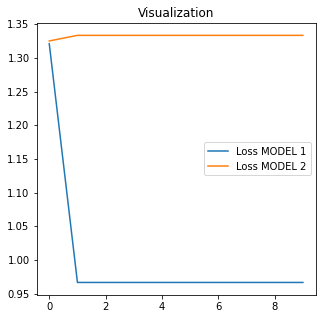

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.title('Visualization')
plt.plot(errorDATA['model1'], label='Loss MODEL 1')
plt.plot(errorDATA['model2'], label='Loss MODEL 2')
plt.legend()
plt.show();

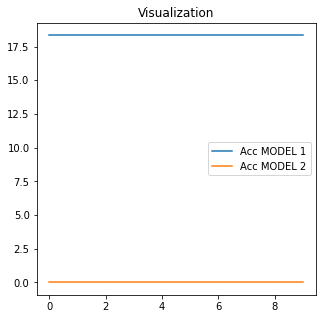

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Visualization')
plt.plot(accuracyDATA['model1'], label='Acc MODEL 1')
plt.plot(accuracyDATA['model2'], label='Acc MODEL 2')
plt.legend()
plt.show();